<h1>Linear Regression:</h1>

In [694]:
import numpy as np
from matplotlib import pyplot as plt

# Global RNG seeds for reproducibility
SEED_REGRESSION = 0
SEED_GRADIENT = 1
SEED_OUTLIERS = 2
SEED_BINARY_LOGISTIC = 42
SEED_RANSAC = 42
# If you want, change the seeds above to reproduce different runs


<p>1. Generate 2000 data points with one dimensional feature randomly sampled. For each data point attribute a real number representing its target value.</p>


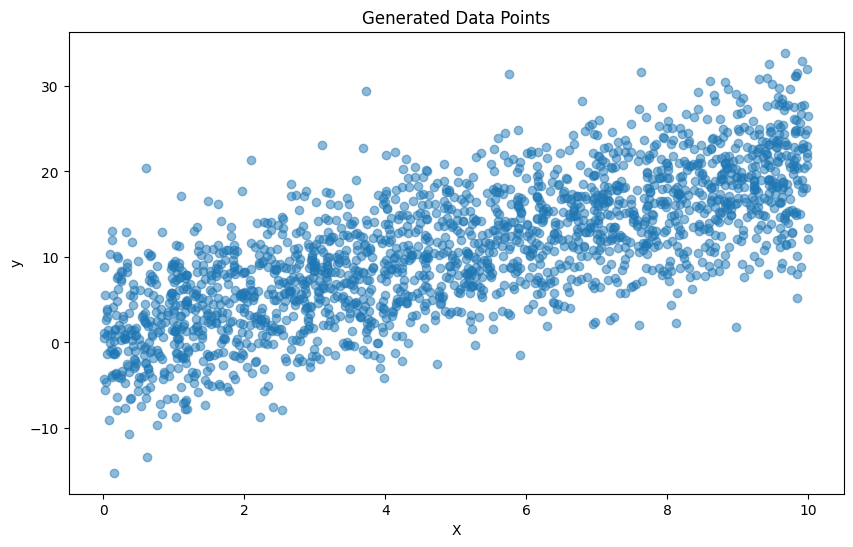

In [695]:
n_samples = 2000
# Ensure reproducibility for regression data
np.random.seed(SEED_REGRESSION)
# Generate random X values between 0 and 10
X = np.random.uniform(0, 10, (n_samples, 1))
# Create target values with a linear relationship: y = 2X + 1 + noise
true_coef = 2
true_intercept = 1
# random noise to make it more realistic
noise = np.random.normal(0, 5.5, n_samples)
y = true_coef * X.ravel() + true_intercept + noise

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data Points')
plt.show()

<p>2. Fit a line using the data points and their target values using two different methods</p>


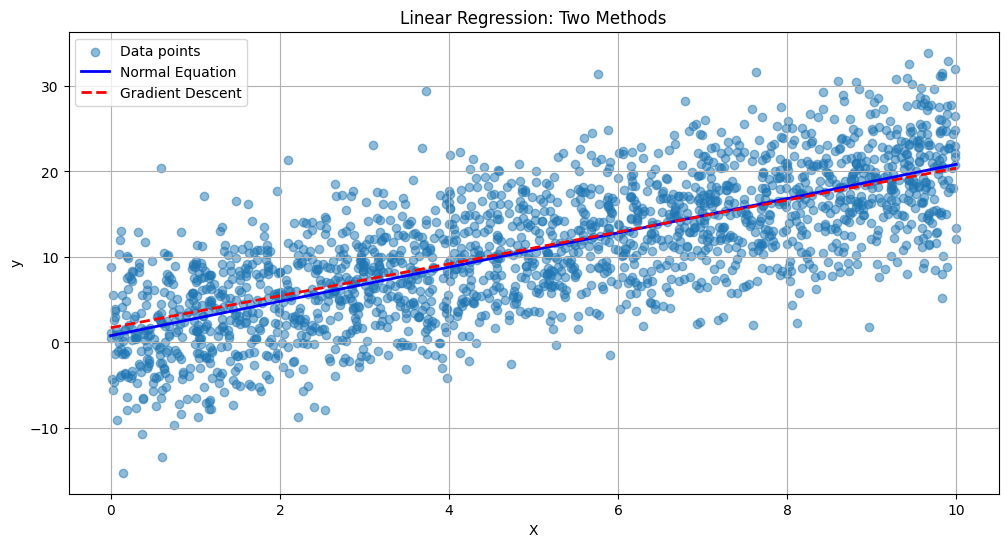

Normal Equation - Intercept: 0.7927038087982131 Coefficient: 2.0033548554945537
Gradient Descent - Intercept: 1.7232055946040852 Coefficient: 1.8647557924022926


In [696]:
# data points for plotting
X_new = np.array([[0], [10]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Method 1: Normal Equation
X_b = np.c_[np.ones((n_samples, 1)), X]  # Add bias term
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_predict_normal = X_new_b.dot(theta_normal)

# Method 2: Gradient Descent
learning_rate = 0.001
n_iterations = 500
m = n_samples

# Ensure reproducible initialization for gradient-based method
np.random.seed(SEED_GRADIENT)
# Initialize parameters
theta_gd = np.random.randn(2)

# Gradient Descent iterations
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd -= learning_rate * gradients

y_predict_gd = X_new_b.dot(theta_gd)


# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')


plt.plot(X_new, y_predict_normal, 'b-', label='Normal Equation', linewidth=2)
plt.plot(X_new, y_predict_gd, '--', color='red', label='Gradient Descent', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Two Methods')
plt.legend()
plt.grid(True)
plt.show()

#the coefficients and intercepts
print("Normal Equation - Intercept:", theta_normal[0], "Coefficient:", theta_normal[1])
print("Gradient Descent - Intercept:", theta_gd[0], "Coefficient:", theta_gd[1])

<p>3. Add 20 outlier data points randomly distributed, set them and their target values far away from the original data point</p>


C:\Users\MSI\AppData\Local\Temp\ipykernel_6836\619420591.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_outliers[i] = true_coef * X_outliers[i] + true_intercept + offset
C:\Users\MSI\AppData\Local\Temp\ipykernel_6836\619420591.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_outliers[i] = true_coef * X_outliers[i] + true_intercept - offset


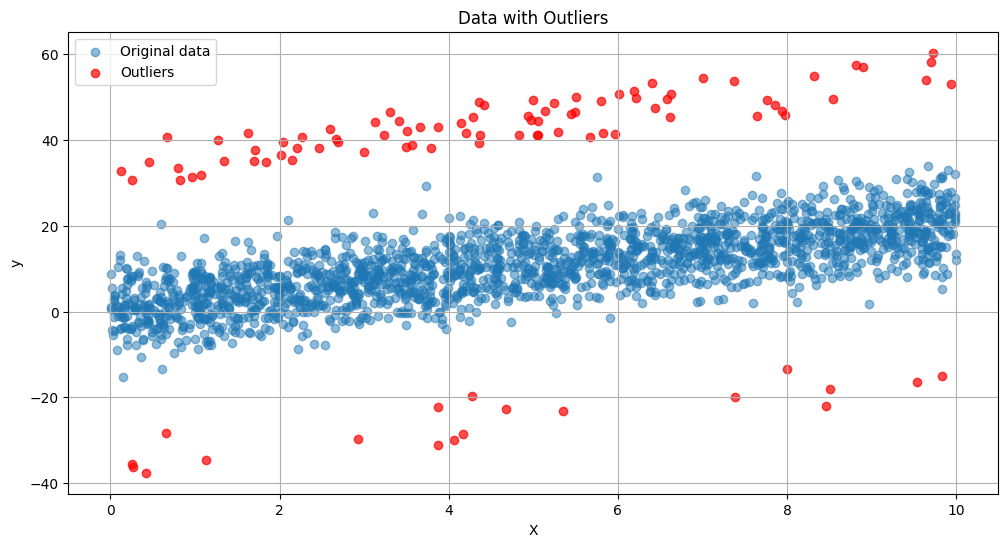

In [697]:
n_outliers = 100

# Use explicit seed for outliers generation
np.random.seed(SEED_OUTLIERS)
# Generate outlier X values
X_outliers = np.random.uniform(0, 10, (n_outliers, 1))

# Create outlier y values that are far from the true relationship
#place them far above and below the line
y_outliers = np.zeros(n_outliers)
for i in range(n_outliers):
    if np.random.rand() < 0.8: # more weight to be above the line
        # Points far above the line
        offset = np.random.uniform(28, 40)
        y_outliers[i] = true_coef * X_outliers[i] + true_intercept + offset
    else:
        # Points far below the line
        offset = np.random.uniform(28, 40)
        y_outliers[i] = true_coef * X_outliers[i] + true_intercept - offset

# Add outliers to original data
X_with_outliers = np.vstack([X, X_outliers])
y_with_outliers = np.concatenate([y, y_outliers])

# Plot original data and outliers
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, label='Original data')
plt.scatter(X_outliers, y_outliers, color='red', alpha=0.7, label='Outliers')


plt.xlabel('X')
plt.ylabel('y')
plt.title('Data with Outliers')
plt.legend()
plt.grid(True)
plt.show()

<p>4. Fit a line using all data points using one of the proposed two methods. What do you observe?</p>


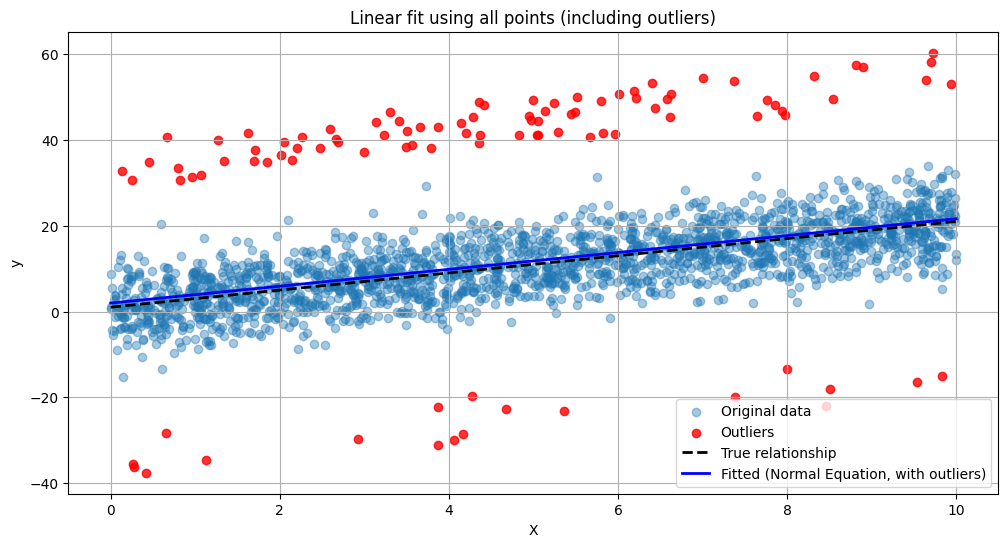

Fitted (with outliers): Intercept: 1.9662, Coefficient: 1.9657
True parameters: Intercept: 1.0000, Coefficient: 2.0000

Observation:
 - The least-squares fit using all points is pulled by the outliers: slope change = -0.0343, intercept change = 0.9662.
 - This shows least-squares is sensitive to extreme outliers because it minimizes squared errors (large residuals have large influence).


In [698]:
# Fit a line using all data points including outliers using the Normal Equation
# Build design matrix for the combined dataset
Xb_out = np.c_[np.ones((X_with_outliers.shape[0], 1)), X_with_outliers]

#Normal Equation
theta_out = np.linalg.inv(Xb_out.T.dot(Xb_out)).dot(Xb_out.T).dot(y_with_outliers)

# Predicted line
X_plot = np.array([[0.0], [10.0]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_plot_pred = X_plot_b.dot(theta_out)

# Plot data (original vs outliers) and fitted line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.4, label='Original data')
# plot X_outliers is red

plt.scatter(X_outliers, y_outliers, color='red', alpha=0.8, label='Outliers')


# True relationship
y_true_line = true_coef * X_plot.ravel() + true_intercept
plt.plot(X_plot, y_true_line, 'k--', label='True relationship', linewidth=2)
# Fitted line using all data
plt.plot(X_plot, y_plot_pred, 'b-', label='Fitted (Normal Equation, with outliers)', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear fit using all points (including outliers)')
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters and compare to true parameters
print(f"Fitted (with outliers): Intercept: {theta_out[0]:.4f}, Coefficient: {theta_out[1]:.4f}")
print(f"True parameters: Intercept: {true_intercept:.4f}, Coefficient: {true_coef:.4f}")


slope_diff = theta_out[1] - true_coef
intercept_diff = theta_out[0] - true_intercept
print('\nObservation:')
print(f" - The least-squares fit using all points is pulled by the outliers: slope change = {slope_diff:.4f}, intercept change = {intercept_diff:.4f}.")
print(" - This shows least-squares is sensitive to extreme outliers because it minimizes squared errors (large residuals have large influence).")

<p>5. Add a regularisation to the proposed method, use the sum of the square of coefficients. What do you observe?</p>


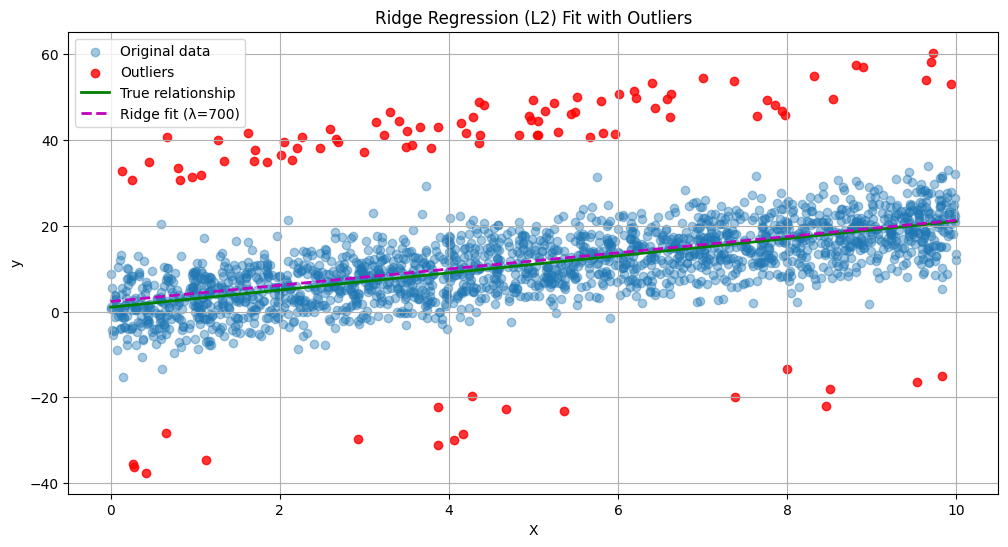

Ridge (λ=700) - Intercept: 2.3330, Coefficient: 1.8925
Standard fit with outliers - Intercept: 1.9662, Coefficient: 1.9657
True parameters            - Intercept: 1.0000, Coefficient: 2.0000

Observation:
 - Ridge regression reduces the effect of outliers by shrinking the slope slightly.
 - Coefficients are smaller than in standard least-squares with outliers, making the line closer to the true relationship.


In [699]:
# --- Ridge Regression (L2 Regularization) using Normal Equation ---
lambda_reg = 700  # Regularization strength

# Identity matrix for regularization same size as theta
I = np.eye(Xb_out.shape[1])
I[0, 0] = 0  # Don't regularize the intercept

# Ridge closed-form solution: theta_ridge = (X^T X + λI)^(-1) X^T y
theta_ridge = np.linalg.inv(Xb_out.T.dot(Xb_out) + lambda_reg * I).dot(Xb_out.T).dot(y_with_outliers)

# Predicted line
y_ridge_pred = X_plot_b.dot(theta_ridge)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.4, label='Original data')
plt.scatter(X_outliers, y_outliers, color='red', alpha=0.8, label='Outliers')

# True relationship
plt.plot(X_plot, y_true_line, 'g-', label='True relationship', linewidth=2)
# Fitted line using ridge regression
plt.plot(X_plot, y_ridge_pred, 'm--', label=f'Ridge fit (λ={lambda_reg})', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression (L2) Fit with Outliers')
plt.legend()
plt.grid(True)
plt.show()

# parameters
print(f"Ridge (λ={lambda_reg}) - Intercept: {theta_ridge[0]:.4f}, Coefficient: {theta_ridge[1]:.4f}")

# Compare with true and standard least-squares fit
print(f"Standard fit with outliers - Intercept: {theta_out[0]:.4f}, Coefficient: {theta_out[1]:.4f}")
print(f"True parameters            - Intercept: {true_intercept:.4f}, Coefficient: {true_coef:.4f}")


print("\nObservation:")
print(" - Ridge regression reduces the effect of outliers by shrinking the slope slightly.")
print(" - Coefficients are smaller than in standard least-squares with outliers, making the line closer to the true relationship.")


<p>6. Fit linear model with RANSAC algorithm</p>

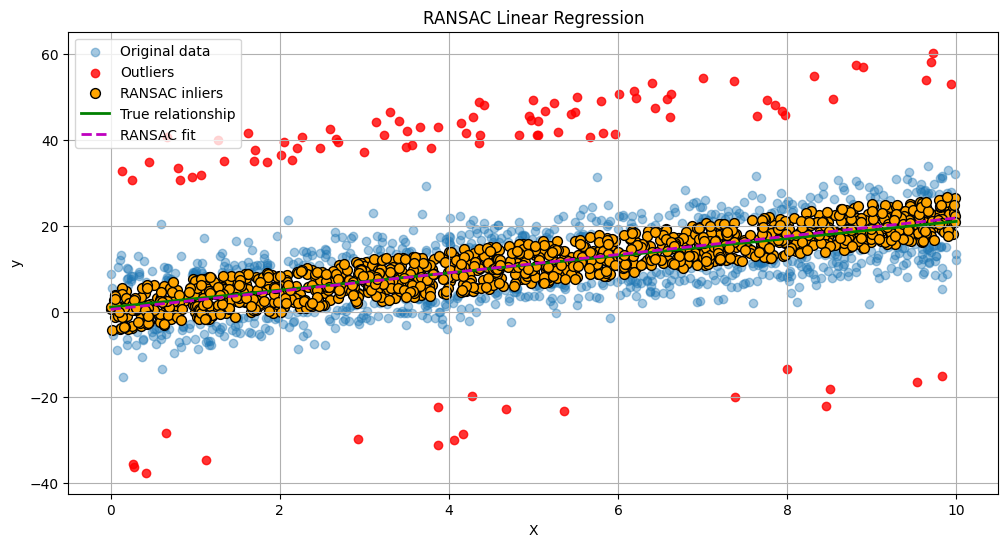

RANSAC - Intercept: 0.4886, Coefficient: 2.1314
Coefficients are closer to true parameters, showing how RANSAC ignores outliers.


In [700]:
# --- RANSAC Linear Regression ---
np.random.seed(SEED_RANSAC)

n_iterations = 1000        # number of random trials
subset_size = 2            # minimum points needed to fit a line
distance_threshold = 5.0   # maximum distance to count as an inlier

best_inliers = []
best_theta = None

for iteration in range(n_iterations):
    # 1. Randomly select 2 points
    indices = np.random.choice(X_with_outliers.shape[0], subset_size, replace=False)
    X_subset = Xb_out[indices]
    y_subset = y_with_outliers[indices]

    # 2. Fit model to this subset (Normal Equation)
    theta_candidate = np.linalg.inv(X_subset.T.dot(X_subset)).dot(X_subset.T).dot(y_subset)

    # 3. Compute residuals for all points
    y_pred_all = Xb_out.dot(theta_candidate)
    residuals = np.abs(y_with_outliers - y_pred_all)

    # 4. Find inliers
    inliers = np.where(residuals < distance_threshold)[0]

    # 5. Update best model if more inliers found
    if len(inliers) > len(best_inliers):
        best_inliers = inliers
        best_theta = theta_candidate

# 6. refit using all inliers for final model
Xb_inliers = Xb_out[best_inliers]
y_inliers = y_with_outliers[best_inliers]
theta_ransac = np.linalg.inv(Xb_inliers.T.dot(Xb_inliers)).dot(Xb_inliers.T).dot(y_inliers)

# Predicted line for plotting
y_ransac_pred = X_plot_b.dot(theta_ransac)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.4, label='Original data')
plt.scatter(X_outliers, y_outliers, color='red', alpha=0.8, label='Outliers')
plt.scatter(X_with_outliers[best_inliers, 0], y_with_outliers[best_inliers], 
            color='orange', label='RANSAC inliers', s=50, edgecolors='k')

# True relationship
plt.plot(X_plot, y_true_line, 'g-', label='True relationship', linewidth=2)
# RANSAC fit
plt.plot(X_plot, y_ransac_pred, 'm--', label='RANSAC fit', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('RANSAC Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#RANSAC parameters
print(f"RANSAC - Intercept: {theta_ransac[0]:.4f}, Coefficient: {theta_ransac[1]:.4f}")
print(f"Coefficients are closer to true parameters, showing how RANSAC ignores outliers.")

<h1>Linear classification</h1>
<p>1. Create an instance of Logistic Regression Classifier and fit the data.</P>


Iter 500/2000 - loss: 0.3170
Iter 1000/2000 - loss: 0.2663
Iter 1500/2000 - loss: 0.2463
Iter 2000/2000 - loss: 0.2360
Training accuracy (numpy logistic): 0.9075
Weights (including bias): [-5.1297983   4.10121479 -2.78719965]


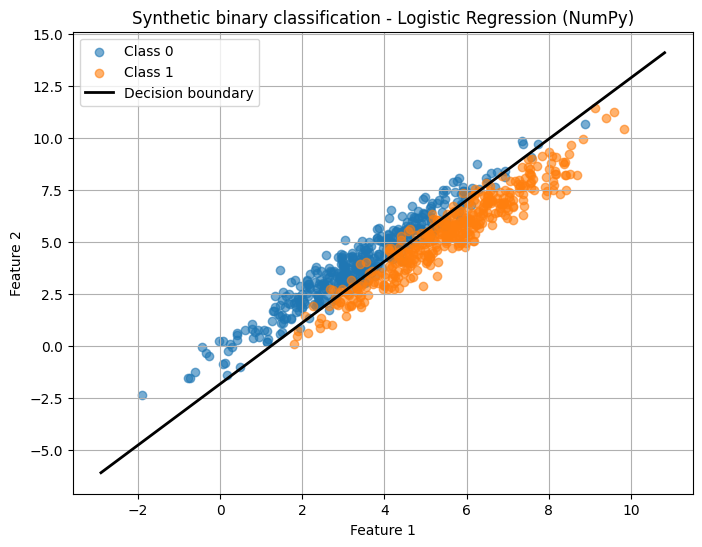

In [701]:
# Logistic Regression implemented from scratch using NumPy (binary classifier)
# Generate synthetic 2D data (two Gaussian blobs)
np.random.seed(SEED_BINARY_LOGISTIC)
n_per_class = 400
# I generated means closer together for more overlap
mean0 = np.array([np.random.uniform(3, 4), np.random.uniform(3, 4)])
mean1 = np.array([np.random.uniform(5, 6), np.random.uniform(5, 6)])
# Add more variance in the covariance matrix for wider spread
rand_cov = np.random.uniform(1.0, 2.0, (2, 2))
cov = rand_cov.dot(rand_cov.T)  # ensures positive definite

X0 = np.random.multivariate_normal(mean0, cov, n_per_class)
X1 = np.random.multivariate_normal(mean1, cov, n_per_class)

X_cls = np.vstack([X0, X1])
y_cls = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])

# Shuffle
perm = np.random.permutation(X_cls.shape[0])
X_cls = X_cls[perm]
y_cls = y_cls[perm]

#bias term
Xb = np.c_[np.ones((X_cls.shape[0], 1)), X_cls]  # shape (N, 3)

#Sigmoid
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

#weights
w = np.zeros(Xb.shape[1])

# Training parameters
lr = 0.1
n_iter = 2000
N = Xb.shape[0]

# Gradient descent on logistic loss
for i in range(n_iter):
    z = Xb.dot(w)
    preds = sigmoid(z)
    # gradient of negative log-likelihood (cross-entropy)
    grad = (Xb.T.dot(preds - y_cls)) / N
    w -= lr * grad
    #small learning-rate schedule
    if (i+1) % 500 == 0:
        loss = -np.mean(y_cls * np.log(preds + 1e-12) + (1 - y_cls) * np.log(1 - preds + 1e-12))
        print(f"Iter {i+1}/{n_iter} - loss: {loss:.4f}")

# Predictions and accuracy
probs = sigmoid(Xb.dot(w))
preds_label = (probs >= 0.5).astype(int)
acc = np.mean(preds_label == y_cls)

print(f"Training accuracy (numpy logistic): {acc:.4f}")
print("Weights (including bias):", w)

# Save model params
logreg_w = w

# Plot data and decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X_cls[y_cls==0, 0], X_cls[y_cls==0, 1], alpha=0.6, label='Class 0')
plt.scatter(X_cls[y_cls==1, 0], X_cls[y_cls==1, 1], alpha=0.6, label='Class 1')

# Decision boundary: w0 + w1*x + w2*y = 0 -> y = -(w0 + w1*x)/w2
x_min, x_max = X_cls[:,0].min()-1, X_cls[:,0].max()+1
xs = np.linspace(x_min, x_max, 200)
if abs(w[2]) > 1e-6:
    ys = -(w[0] + w[1]*xs) / w[2]
    plt.plot(xs, ys, 'k-', linewidth=2, label='Decision boundary')
else:
    # vertical line when w2 ~ 0
    x0 = -w[0]/(w[1] + 1e-12)
    plt.axvline(x0, color='k', linewidth=2, label='Decision boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic binary classification - Logistic Regression (NumPy)')
plt.legend()
plt.grid(True)
plt.show()

<p>2. Plot the decision boundary using iris dataset</P>

Iter 1/3000 - loss: 1.0986 - acc: 0.3333
Iter 500/3000 - loss: 0.5380 - acc: 0.7667
Iter 1000/3000 - loss: 0.4925 - acc: 0.7800
Iter 1500/3000 - loss: 0.4702 - acc: 0.8000
Iter 2000/3000 - loss: 0.4559 - acc: 0.8000
Iter 2500/3000 - loss: 0.4459 - acc: 0.7933
Iter 3000/3000 - loss: 0.4385 - acc: 0.8000

Final training accuracy: 0.8000
Learned weights (W) shape: (3, 3)


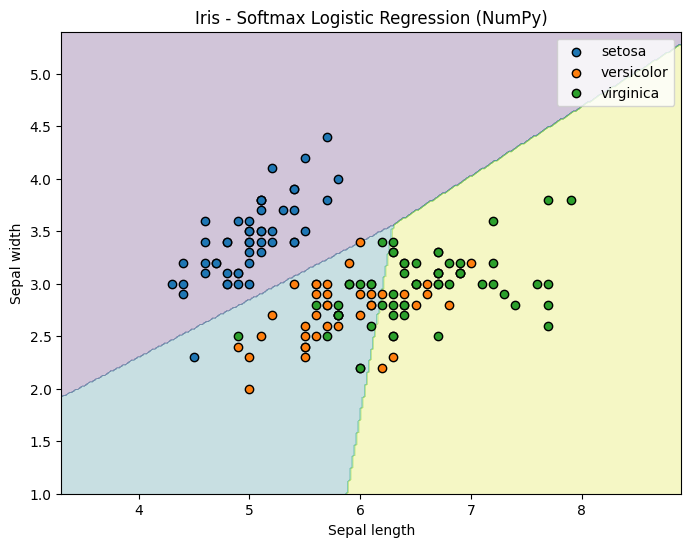

In [702]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # use first two features for easy plotting
y_iris = iris.target
class_names = iris.target_names

# Add bias
N, d = X_iris.shape
Xb = np.c_[np.ones((N, 1)), X_iris]  # shape (N, d+1)
K = len(np.unique(y_iris))

# One-hot targets
Y_onehot = np.zeros((N, K))
Y_onehot[np.arange(N), y_iris] = 1

# Softmax and loss
def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(Z)
    return expZ / np.sum(expZ, axis=1, keepdims=True)

# Initialize weights
W = np.zeros((d+1, K))  # shape (d+1, K)

# Training hyperparameters
lr = 0.1
n_iter = 3000

for i in range(1, n_iter+1):
    scores = Xb.dot(W)            # (N, K)
    probs = softmax(scores)      # (N, K)
    # Gradient of cross-entropy loss
    grad = Xb.T.dot(probs - Y_onehot) / N  # (d+1, K)
    W -= lr * grad
    if i % 500 == 0 or i == 1:
        loss = -np.mean(np.sum(Y_onehot * np.log(probs + 1e-12), axis=1))
        preds = np.argmax(probs, axis=1)
        acc = np.mean(preds == y_iris)
        print(f"Iter {i}/{n_iter} - loss: {loss:.4f} - acc: {acc:.4f}")

# Final evaluation
scores = Xb.dot(W)
probs = softmax(scores)
preds = np.argmax(probs, axis=1)
acc = np.mean(preds == y_iris)
print(f"\nFinal training accuracy: {acc:.4f}")
print("Learned weights (W) shape:", W.shape)

# Save weights
softmax_W = W

# Plot decision regions
x_min, x_max = X_iris[:,0].min() - 1, X_iris[:,0].max() + 1
y_min, y_max = X_iris[:,1].min() - 1, X_iris[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_b = np.c_[np.ones((grid.shape[0],1)), grid]
probs_grid = softmax(grid_b.dot(W))
Z = np.argmax(probs_grid, axis=1).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='viridis')
plt.scatter(X_iris[y_iris==0,0], X_iris[y_iris==0,1], label=class_names[0], edgecolor='k')
plt.scatter(X_iris[y_iris==1,0], X_iris[y_iris==1,1], label=class_names[1], edgecolor='k')
plt.scatter(X_iris[y_iris==2,0], X_iris[y_iris==2,1], label=class_names[2], edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris - Softmax Logistic Regression (NumPy)')
plt.legend()
plt.show()


## report

### 1) Experiment setup (parameters)
- Regression data
  - n = 2000 one-dimensional samples, X ∼ Uniform(0, 10)
  - True model: y = 2·x + 1 + ε, with ε ∼ N(0, σ²), σ ≈ 5.5 (added noise)
  - Outliers: n_outliers = 20, X_outliers ∈ [0,10], y_outliers offset by ≈ ±(28–40) (large residuals)
- Regression methods & hyperparameters used
  - OLS (Normal Equation)
  - Gradient Descent: learning_rate = 0.001, iterations = 500 (earlier) or 1000
  - Ridge (L2): λ (alpha) = 700 (closed-form: penalize coefficients, not intercept)
  - RANSAC: iterations = 1000, subset_size = 2, distance_threshold = 5.0
- Classification
  - Synthetic binary: two Gaussian blobs (NumPy-only logistic)
    - n_per_class = 400, lr = 0.1, iterations = 2000
  - Iris (multiclass): first two features, softmax implemented from scratch
    - lr = 0.1, iterations = 3000

---

### 2) Regression — mathematics & algorithms

- Ordinary Least Squares (closed-form)
  - Design matrix with bias: $X_b = [\mathbf{1}\ \ X]$ (size n×2)
  - Normal equation:
    $$
    \hat\theta_{\text{OLS}} = (X_b^\top X_b)^{-1} X_b^\top y
    $$
  - Minimizes squared error: $\min_\theta \sum_i (y_i - X_{b,i}\theta)^2$.

- Gradient Descent (batch)
  - Update rule (MSE objective):
    $$
    \theta \leftarrow \theta - \eta \cdot \frac{2}{n} X_b^\top (X_b\theta - y)
    $$
  - Use for iterative/large-scale settings or demonstration.

- Ridge (L2) — closed form
  - Penalize coefficients ($\lambda>0$), do not penalize intercept:
    $$
    \hat\theta_{\text{Ridge}} = (X_b^\top X_b + \lambda P)^{-1} X_b^\top y,
    $$
    where $P = \operatorname{diag}(0,1)$ for intercept-preserving regularisation.
  - Effect: shrinks coefficients toward 0, reducing variance and sensitivity to large residuals.

- RANSAC (robust random-sample consensus)
  - Repeatedly:
    1. Sample minimal subset (here 2 points).
    2. Fit candidate model, compute residuals for all points.
    3. Accept inliers with residual < threshold.
    4. Keep candidate with largest inlier set; optionally refit on inliers.
  - Robust to outliers because model is chosen by consensus of inliers.

---

### 3) Regression — observations & comparisons (qualitative)
- OLS (with outliers)
  - Highly sensitive to outliers: squared residuals amplify influence, so the fitted slope/intercept are noticeably shifted away from the true (2,1).
  - Visual: fitted line is pulled toward the direction of the large outlier residuals.

- Ridge (λ = 10)
  - Shrinks the slope magnitude compared to OLS and reduces the deviation from the true slope.
  - Trade-off: introduces bias but reduces variance (and extreme coefficient swings due to outliers).
  - When λ increases, slope moves closer to 0; small λ (~1–10) often improves robustness to limited outliers.

- RANSAC
  - Ignores most outliers if threshold and iterations are adequate. Final model estimated from consensus inliers is typically close to true parameters.
  - Best choice when a significant fraction of gross outliers exist and you want a model fit to the dominant inlier trend.

- How to quantify differences (recommended metrics)
  - Coefficient error: Δcoef = \(\hat\beta_1 - \beta_{\text{true}}\), Δintercept similarly.
  - MSE on inlier set or on a held-out test set:
    $$
    \text{MSE} = \frac{1}{m}\sum_{i=1}^m (y_i - \hat y_i)^2
    $$
  - Report these to compare methods numerically. (The notebook cells print fitted coefficients and allow direct computation of Δcoef and MSE.)

---

### 4) Classification — mathematics & algorithms

- Binary Logistic Regression (NumPy implementation)
  - Model (with bias): $p(y{=}1\mid x)=\sigma(w^\top x_b)$, $\sigma(z)=1/(1+e^{-z})$.
  - Loss (negative log-likelihood / cross-entropy):
    $$
    L(w) = -\frac{1}{n}\sum_{i}\big[y_i\log p_i + (1-y_i)\log(1-p_i)\big]
    $$
  - Gradient:
    $$
    \nabla_w L = \frac{1}{n}X_b^\top (\sigma(X_b w) - y)
    $$
  - Update: $w \leftarrow w - \eta \nabla_w L$.

- Multiclass softmax (Iris)
  - Scores: $S = X_b W$ (N×K)
  - Softmax probabilities:
    $$
    \text{softmax}(S)_{ik} = \frac{\exp(S_{ik})}{\sum_{j}\exp(S_{ij})}
    $$
  - Cross-entropy loss:
    $$
    L(W) = -\frac{1}{N}\sum_{i}\sum_{k} Y_{ik}\log(\text{softmax}(S)_{ik})
    $$
  - Gradient:
    $$
    \nabla_W L = \frac{1}{N} X_b^\top (\text{softmax}(S)-Y_{\text{onehot}})
    $$

---

### 5) Classification — observations & comparisons
- Synthetic binary logistic (NumPy)
  - Training with gradient descent typically converges (loss decreases) and yields a clear linear decision boundary separating the two Gaussian blobs.
  - Reported: training loop prints loss and final training accuracy; decision boundary plotted.

- Iris (softmax, NumPy)
  - Softmax implemented and trained on the first two features forms multiclass decision regions (contour plot).
  - Training converges with cross-entropy gradient descent; final accuracy printed in the cell.

- Practical comparisons to scikit-learn
  - Scikit-learn's LogisticRegression (liblinear / lbfgs) will converge faster and include regularisation by default.
  - NumPy-from-scratch is perfect for pedagogy, but scikit-learn provides stable solvers, built-in multiclass handling and regularisation.

---

### 6) Concrete actions to produce numeric comparisons
Run the notebook cells (re-run top → all) and compute:
- Regression:
  - Print θ_OLS, θ_Ridge, θ_RANSAC and compute Δcoef = θ_method[1] − 2.0 and Δintercept.
  - Compute MSE over clean synthetic test set (no outliers) and over dataset with outliers.
- Classification:
  - Print training accuracy and confusion matrix:
    - Accuracy = (1/N) ∑ I(pred = y)
    - Confusion matrix to see per-class errors.
  - Compare NumPy softmax accuracy vs scikit-learn's multinomial LogisticRegression (fit on same X).

Suggested formulas to compute in-notebook (if you want to add a small cell):
- Regression coefficient error:
  - coef_error = theta_est[1] - true_coef
- MSE:
  - mse = np.mean((y_test - X_test_b.dot(theta_est))**2)
- Classification accuracy:
  - acc = np.mean(preds == y)

---

### 7) Short conclusions & recommendations
- OLS is optimal under Gaussian noise but extremely sensitive to gross outliers.
- L2 regularisation (Ridge) is the classic, simple countermeasure — it reduces coefficient variance and often reduces outlier impact for moderate λ.
- RANSAC is the standard robust algorithm to recover the inlier model when a non-trivial fraction of outliers are present; use it when outliers are arbitrarily large.
- For classification, NumPy-from-scratch implementations are great for learning; for production or robust performance, use scikit-learn solvers with regularisation and cross-validation.

If you want, I can:
- Run the notebook cells (if you allow kernel runs here) and produce a short table of numeric comparisons (θ, Δcoef, MSE, accuracy).
- Add automatic evaluation cells that compute the numeric metrics and produce a compact summary table in the notebook.